Scenario:

I'm a data analyst working for a book recommendation and review platform. You have access to a large dataset of book information from Goodreads, including ratings, reviews, and book metadata.

My Goal:

My goal is to analyse this dataset to understand reader preferences and trends to improve book recommendations and personalize the user experience on the platform.



## Data loading

Load the book data from the provided CSV file into a pandas DataFrame.


In [48]:
import pandas as pd

df_books = pd.read_csv('/content/books.csv')
display(df_books.head())

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.78044E+12,eng,870,2153167,29221,09/01/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.78044E+12,eng,352,6333,244,11/01/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05/01/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


## Data cleaning




**Reasoning**:
Inspect the 'average_rating', 'text_reviews_count', and 'ratings_count' columns for missing values, duplicates, and inconsistencies. Then, clean the data by removing duplicates and handling missing or inconsistent values.



In [49]:
# Inspect missing values
print(df_books[['average_rating', 'text_reviews_count', 'ratings_count']].isnull().sum())

# Convert 'average_rating', 'text_reviews_count', 'ratings_count' to numeric, coercing errors
for col in ['average_rating', 'text_reviews_count', 'ratings_count']:
    df_books[col] = pd.to_numeric(df_books[col], errors='coerce')

# Handling missing values: Fill with the mean for numerical columns
for col in ['average_rating', 'text_reviews_count', 'ratings_count']:
    df_books[col] = df_books[col].fillna(df_books[col].mean())

# Remove duplicates
num_duplicates = df_books.duplicated().sum()
df_books = df_books.drop_duplicates()
print(f"Number of duplicate rows removed: {num_duplicates}")

# Check for inconsistencies (e.g. negative values) and handle them
for col in ['average_rating', 'text_reviews_count', 'ratings_count']:
    # Check for negative values
    if (df_books[col] < 0).any():
        print(f"Negative values found in {col}, replacing with 0")
        df_books.loc[df_books[col] < 0, col] = 0
    # Check for values outside a reasonable range (adjust range as needed)
    if col == 'average_rating':
        df_books.loc[df_books[col] > 5, col] = 5
    elif col == 'text_reviews_count':
        # No specific range check for text_reviews_count
        pass
    elif col == 'ratings_count':
        # No specific range check for ratings_count
        pass

display(df_books.head())

average_rating        0
text_reviews_count    0
ratings_count         0
dtype: int64
Number of duplicate rows removed: 0


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.78044E+12,eng,870,2153167,29221,09/01/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.78044E+12,eng,352,6333,244,11/01/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05/01/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


# Data Visualisation:

# Books with most occurrences

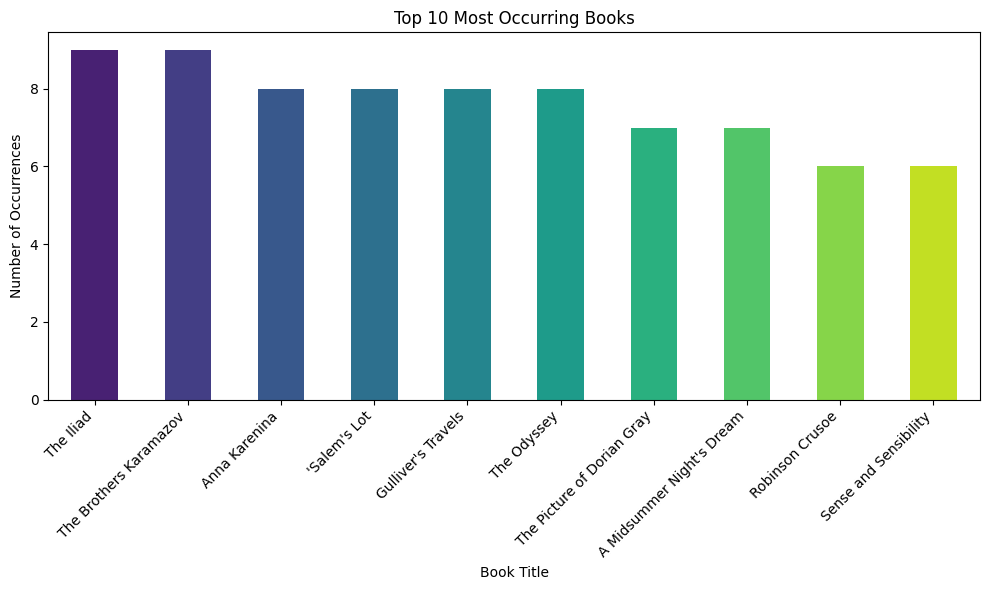

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and cleaned the data into df_books

# Books with most occurrences
book_counts = df_books['title'].value_counts().head(10)  # Get top 10 most frequent books

plt.figure(figsize=(10, 6))
# Using a color palette for the first bar chart
book_counts.plot(kind='bar', color=sns.color_palette("viridis", len(book_counts)))
plt.title('Top 10 Most Occurring Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 10 most-rated books

<ipython-input-51-dffae552d6b7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ratings_count', y=most_rated.index, data=most_rated, palette="magma")


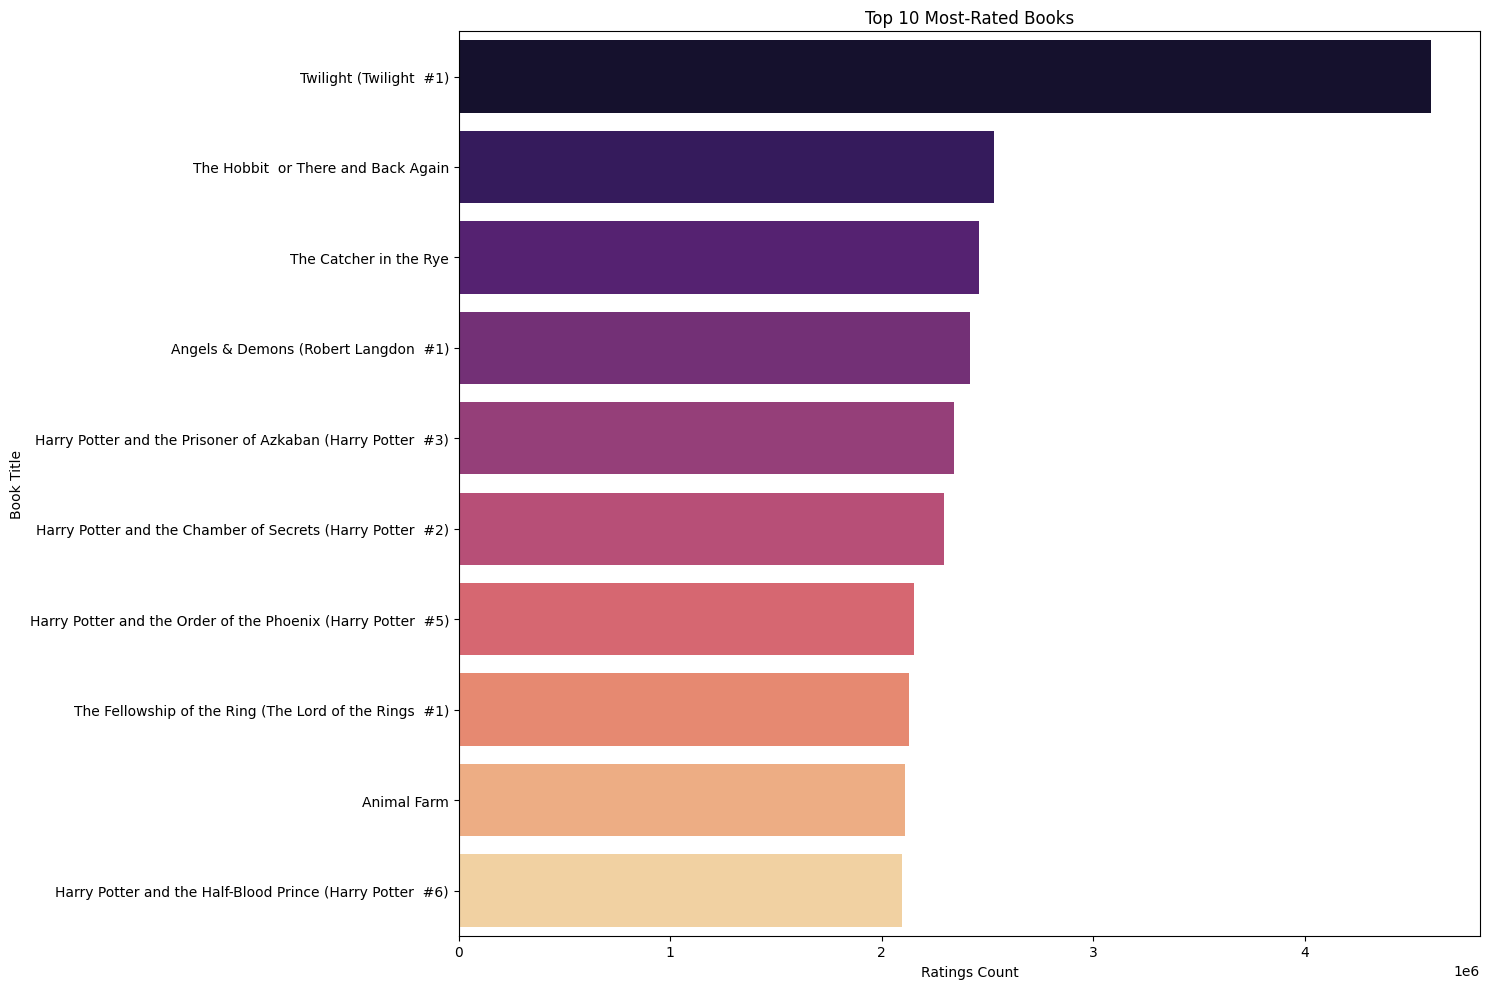

In [51]:
# Top 10 most-rated books
most_rated = df_books.sort_values('ratings_count', ascending=False).head(10).set_index('title')
plt.figure(figsize=(15, 10))
# Using a different color palette for the second bar chart
sns.barplot(x='ratings_count', y=most_rated.index, data=most_rated, palette="magma")
plt.title('Top 10 Most-Rated Books') # Added title
plt.xlabel('Ratings Count') # Added x-axis label
plt.ylabel('Book Title') # Added y-axis label
plt.tight_layout()
plt.show()

# Distribution of Average Ratings

This visualisation helps understand the overall distribution of book ratings, giving insight into user preferences and the general quality of books in the dataset.


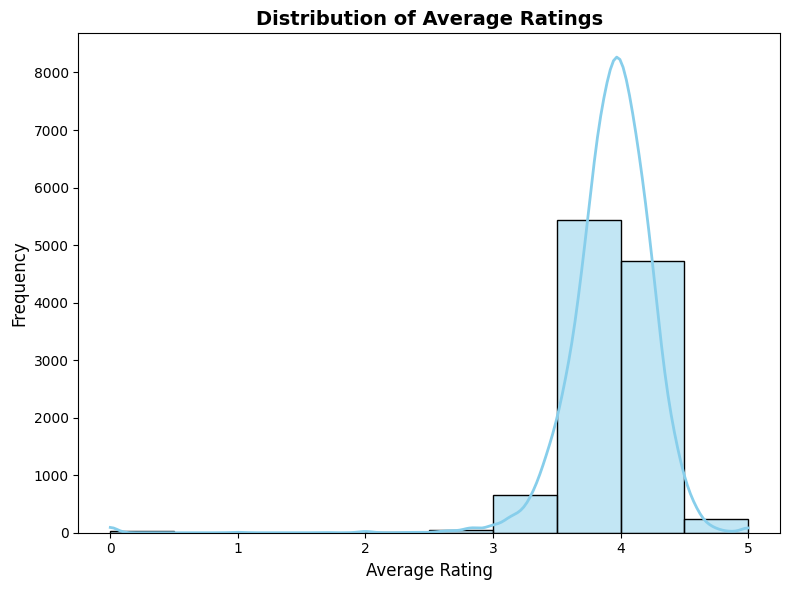

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df_books['average_rating'], bins=10, color='skyblue', edgecolor='black', kde=True, line_kws={'linewidth': 2})
plt.title('Distribution of Average Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

Relationship between Average Rating and Ratings Count

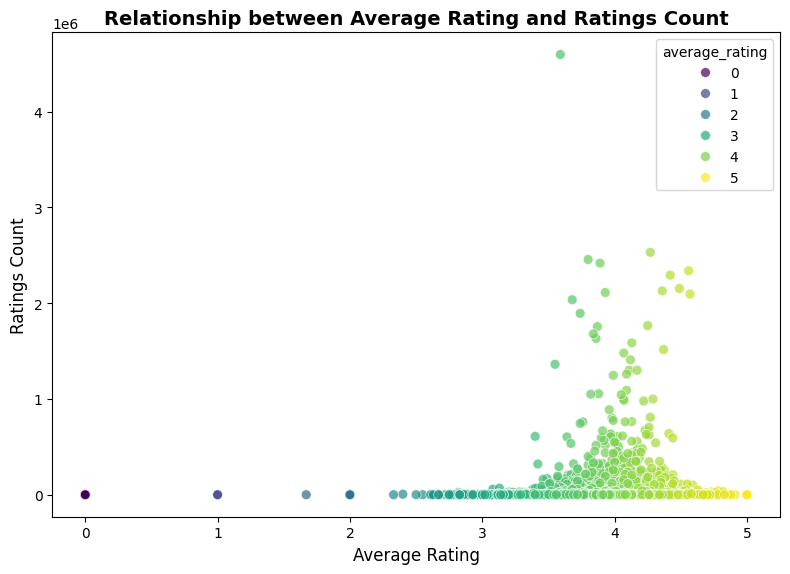

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_rating', y='ratings_count', data=df_books, hue='average_rating', palette='viridis', s=50, alpha=0.7)
plt.title('Relationship between Average Rating and Ratings Count', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Ratings Count', fontsize=12)
plt.tight_layout()
plt.show()


# Number of Books Published Over Time

This line graph shows the trend of book publications over time, which can reveal changes in publishing patterns and potentially identify popular periods for specific genres.



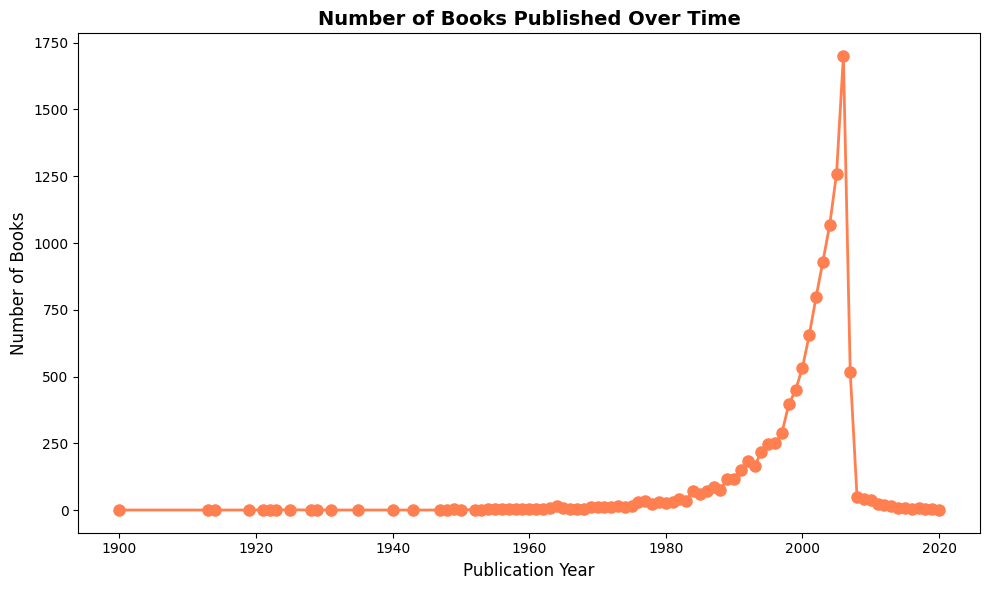

In [26]:
df_books['publication_year'] = pd.to_numeric(df_books['publication_year'], errors='coerce')
books_by_year = df_books.groupby('publication_year')['bookID'].count()

plt.figure(figsize=(10, 6))
books_by_year.plot(kind='line', color='coral', marker='o', linewidth=2, markersize=8)  # Using a bright color
plt.title('Number of Books Published Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Publication Year', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.tight_layout()
plt.show()

Top 10 Books with Most Text Reviews

This bar chart highlights the books that have received the most text reviews, indicating which books have generated the most discussion and user engagement.

<ipython-input-28-70a1588a6d4b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='text_reviews_count', y=most_reviewed.index, data=most_reviewed, palette="rocket")  # Using a vibrant palette


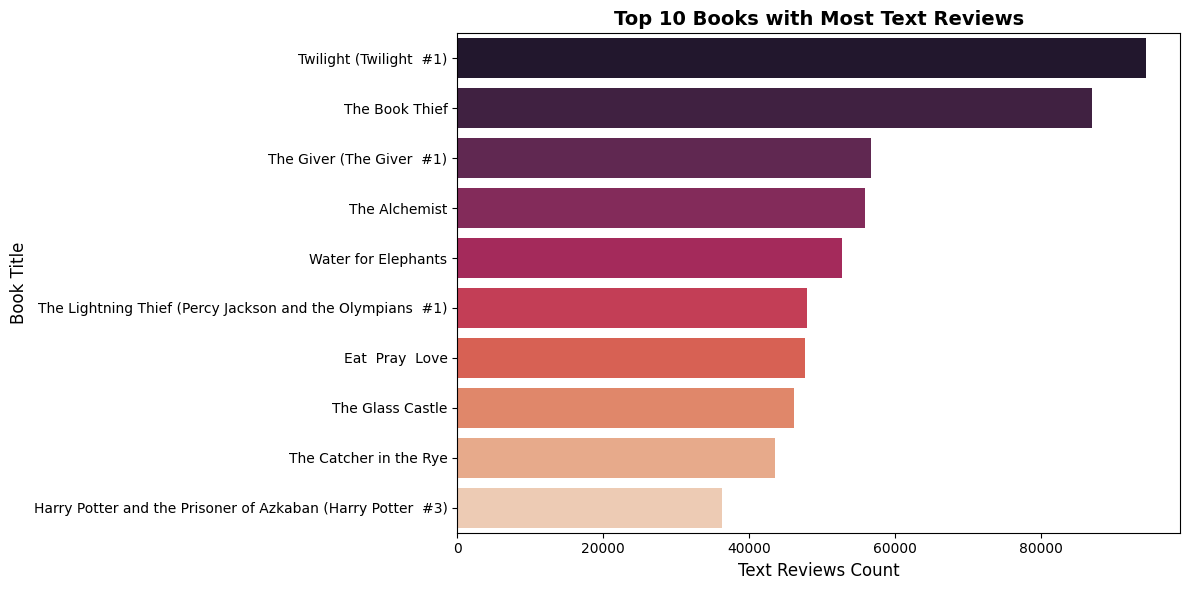

In [28]:
most_reviewed = df_books.sort_values('text_reviews_count', ascending=False).head(10).set_index('title')

plt.figure(figsize=(12, 6))
sns.barplot(x='text_reviews_count', y=most_reviewed.index, data=most_reviewed, palette="rocket")  # Using a vibrant palette
plt.title('Top 10 Books with Most Text Reviews', fontsize=14, fontweight='bold')
plt.xlabel('Text Reviews Count', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.tight_layout()
plt.show()

In [47]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful